60000 60000
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 784), dtype=float32) tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]], shape=(60000, 10), dtype=float32)
10000 10000
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 784), dtype=float32) tf.Tensor(
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 10), dtype=float32)
Epoch: 0001, Cost: 2.557298183
Epoch: 0002, Cost: 1.021223426
Epoch: 0003, Cost: 0.808580279
Epoch: 0004, Cost: 0.706655800
Epoch: 0005, Cost: 0.643622339
Epoch: 0006

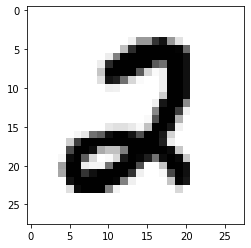

'\nEpoch: 0001, Cost: 2.826302672\nEpoch: 0002, Cost: 1.061668952\nEpoch: 0003, Cost: 0.838061315\nEpoch: 0004, Cost: 0.733232745\nEpoch: 0005, Cost: 0.669279885\nEpoch: 0006, Cost: 0.624611836\nEpoch: 0007, Cost: 0.591160344\nEpoch: 0008, Cost: 0.563868987\nEpoch: 0009, Cost: 0.541745171\nEpoch: 0010, Cost: 0.522673578\nEpoch: 0011, Cost: 0.506782325\nEpoch: 0012, Cost: 0.492447643\nEpoch: 0013, Cost: 0.479955837\nEpoch: 0014, Cost: 0.468893674\nEpoch: 0015, Cost: 0.458703488\nLearning finished\nAccuracy:  0.8951\n'

In [11]:
# Lab 7 Learning rate and Evaluation
from functools import partial as bind
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
assert(tf.__version__.find('2') == 0)
tf.random.set_seed(777)  # for reproducibility

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = tf.reshape(x_train, [-1, 28*28])
x_train = tf.cast(x_train, tf.float32)
y_train = tf.one_hot(y_train, 10)
y_train = tf.cast(y_train, tf.float32)
x_train_len = len(x_train)
y_train_len = len(y_train)
print(x_train_len, y_train_len)
print(x_train, y_train)

x_test = tf.reshape(x_test, [-1, 28*28])
x_test = tf.cast(x_test, tf.float32)
y_test = tf.one_hot(y_test, 10)
x_test_len = len(x_test)
y_test_len = len(y_test)
print(x_test_len, y_test_len)
print(x_test, y_test)

nb_classes = 10

W = tf.Variable(tf.random.normal([784, nb_classes]))
b = tf.Variable(tf.random.normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = lambda X: tf.nn.softmax(tf.matmul(X, W) + b)

@tf.function
def cost(X, Y):
    return tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(hypothesis(X)), axis=1))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Test model
is_correct = lambda X, Y: tf.equal(tf.argmax(hypothesis(X), 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = lambda X, Y: tf.reduce_mean(tf.cast(is_correct(X, Y), tf.float32))

# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(x_train_len / batch_size)

for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
        pos = i * batch_size
        batch_xs = x_train[pos: pos + batch_size, :]
        batch_ys = y_train[pos: pos + batch_size, :]
#         print(batch_xs)
#         print(batch_ys)
        
        # Minimize
        optimizer.minimize(bind(cost, batch_xs, batch_ys), var_list=[W, b])
        cost_val = cost(batch_xs, batch_ys)
        avg_cost += cost_val / num_iterations

    tf.print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

tf.print("Learning finished")

# Test the model using test sets
tf.print(
    "Accuracy: ",
    accuracy(x_test, y_test)
)

# Get one and predict
r = random.randint(0, y_test_len - 1)
tf.print(
    "Label: ", tf.argmax(y_test[r : r + 1], 1)
)
tf.print(
    "Prediction: ",
    tf.argmax(hypothesis(x_test[r : r + 1]), 1),
)

plt.imshow(
    tf.reshape(x_test[r : r + 1], [28, 28]),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()


'''
Epoch: 0001, Cost: 2.826302672
Epoch: 0002, Cost: 1.061668952
Epoch: 0003, Cost: 0.838061315
Epoch: 0004, Cost: 0.733232745
Epoch: 0005, Cost: 0.669279885
Epoch: 0006, Cost: 0.624611836
Epoch: 0007, Cost: 0.591160344
Epoch: 0008, Cost: 0.563868987
Epoch: 0009, Cost: 0.541745171
Epoch: 0010, Cost: 0.522673578
Epoch: 0011, Cost: 0.506782325
Epoch: 0012, Cost: 0.492447643
Epoch: 0013, Cost: 0.479955837
Epoch: 0014, Cost: 0.468893674
Epoch: 0015, Cost: 0.458703488
Learning finished
Accuracy:  0.8951
'''


Label:  [0]
Prediction:  [0]


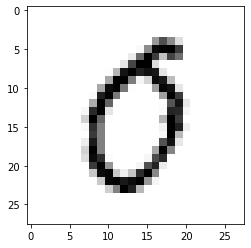

In [12]:

# Get one and predict
r = random.randint(0, y_test_len - 1)
tf.print(
    "Label: ", tf.argmax(y_test[r : r + 1], 1)
)
tf.print(
    "Prediction: ",
    tf.argmax(hypothesis(x_test[r : r + 1]), 1),
)

plt.imshow(
    tf.reshape(x_test[r : r + 1], [28, 28]),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()


Label:  [6]
Prediction:  [6]


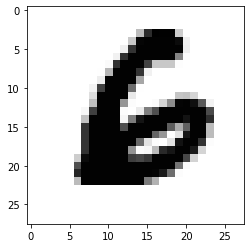

In [13]:

# Get one and predict
r = random.randint(0, y_test_len - 1)
tf.print(
    "Label: ", tf.argmax(y_test[r : r + 1], 1)
)
tf.print(
    "Prediction: ",
    tf.argmax(hypothesis(x_test[r : r + 1]), 1),
)

plt.imshow(
    tf.reshape(x_test[r : r + 1], [28, 28]),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()


Label:  [0]
Prediction:  [0]


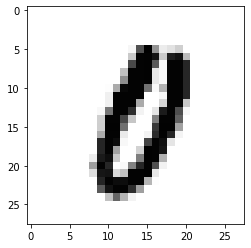

In [14]:

# Get one and predict
r = random.randint(0, y_test_len - 1)
tf.print(
    "Label: ", tf.argmax(y_test[r : r + 1], 1)
)
tf.print(
    "Prediction: ",
    tf.argmax(hypothesis(x_test[r : r + 1]), 1),
)

plt.imshow(
    tf.reshape(x_test[r : r + 1], [28, 28]),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()


Label:  [1]
Prediction:  [1]


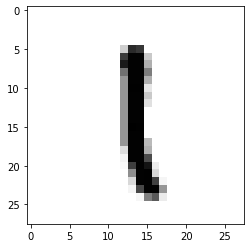

In [15]:

# Get one and predict
r = random.randint(0, y_test_len - 1)
tf.print(
    "Label: ", tf.argmax(y_test[r : r + 1], 1)
)
tf.print(
    "Prediction: ",
    tf.argmax(hypothesis(x_test[r : r + 1]), 1),
)

plt.imshow(
    tf.reshape(x_test[r : r + 1], [28, 28]),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()
